In [4]:
import re
from finol.data_layer.data_loader import *
from finol.optimization_layer.model_trainer import *
from finol.evaluation_layer.model_evaluator import *
from finol.config import *

with open(ROOT_PATH + '/config.py', 'r') as file:
    content = file.read()

content = re.sub(r'(TUTORIAL_MODE\s*=\s*).*', r'\g<1>True', content)
content = re.sub(r'(TUTORIAL_NAME\s*=\s*").*?(")', r'\g<1>' + "TUTORIAL_5" + r'\g<2>', content)

with open(ROOT_PATH + '/config.py', 'w') as file:
    file.write(content)

In [2]:
load_dataset_output = load_dataset()

Data Loading: 100%|██████████| 48/48 [00:06<00:00,  7.14it/s]


Successfully loaded 48 Excel file(s):

Data Processing: 100%|██████████| 48/48 [00:03<00:00, 15.43it/s]


D:\360安全云盘同步版\01-广工\07-研一\00-论文\00-本人论文\13-FinOL\FinOL\finol\evaluation_layer\benchmark_loader.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3395037651062012' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  final_profit_result.loc[0, MODEL_NAME] = caculate_metric_output["CW"]


Metric    Market      Best      UCRP      BCRP        UP        EG  \
0     CW  0.918692  1.750000  0.944414  1.750230  0.942098  0.942986   
1    APY -0.100865  1.016993 -0.069192  1.017325 -0.072053 -0.070956   
2     SR -0.843373  1.764196 -0.647517  1.786789 -0.664730 -0.658449   

       SCRP        PPT      SSPO  ...        RMR       RPRT     AICTR  \
0  0.461345   7.411994  6.363769  ...   5.875739   8.628073  5.803522   
1 -0.620879  11.321537  9.177519  ...   8.208688  13.906803  8.067012   
2 -1.174742  12.055126  9.615895  ...  11.310034  14.636133  8.613908   

       KTPT        SP       ONS       GRW      WAAS    CW-OGD  LSRE-CAAN  
0  5.491175  0.944414  1.251331  1.062152  0.940818  0.974540   1.339504  
1  7.459440 -0.069192  0.324581  0.078527 -0.073633 -0.031817   0.442625  
2  8.403826 -0.647517  0.772084  0.125168 -0.674614 -0.348717   0.721826  

[3 rows x 27 columns]

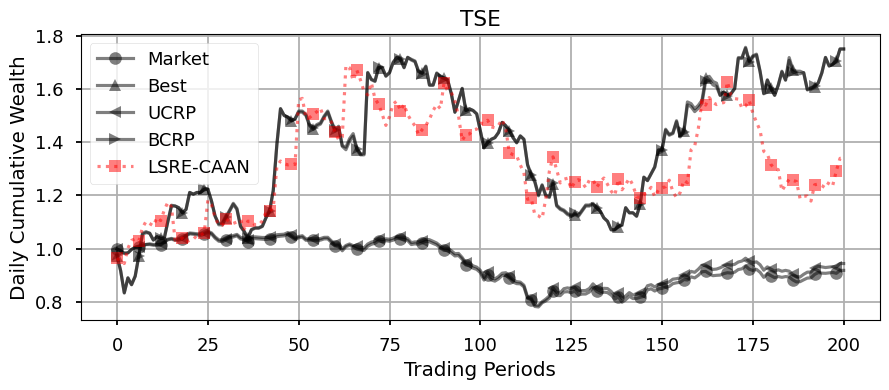

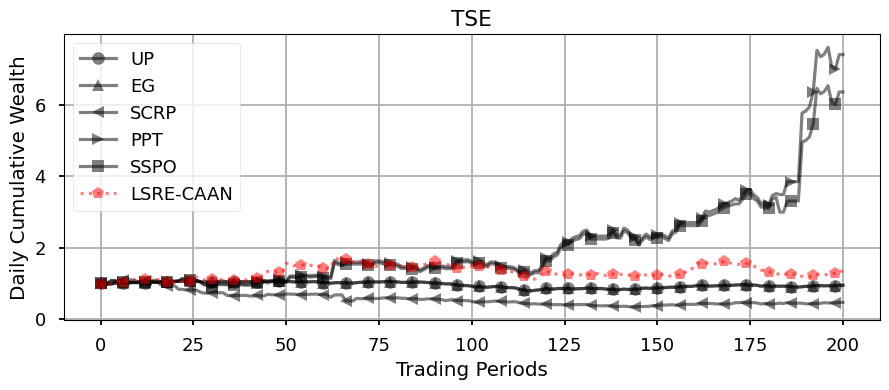

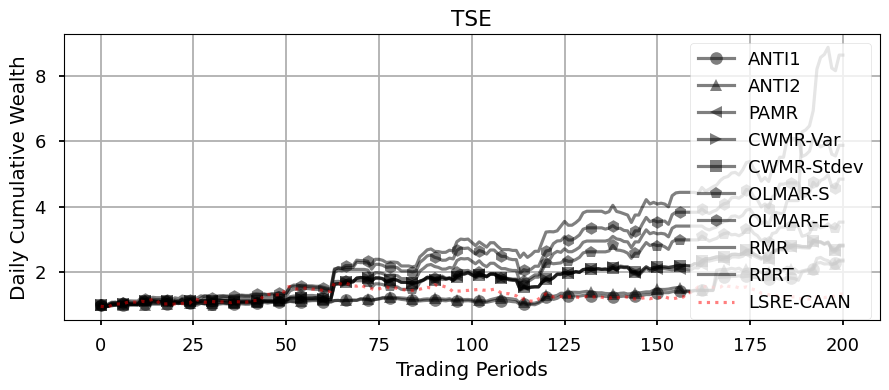

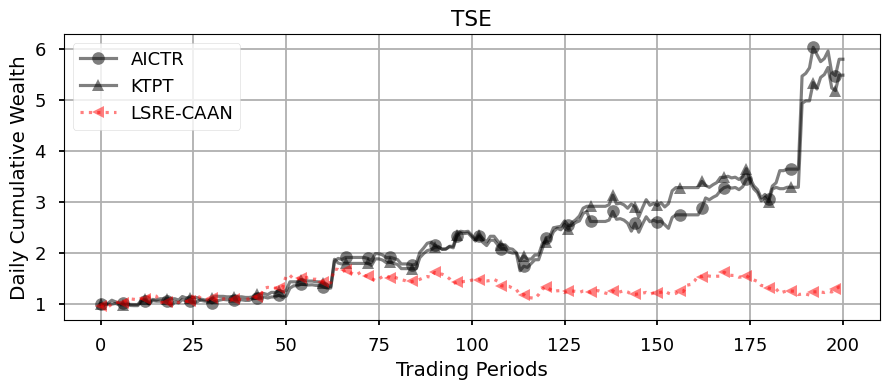

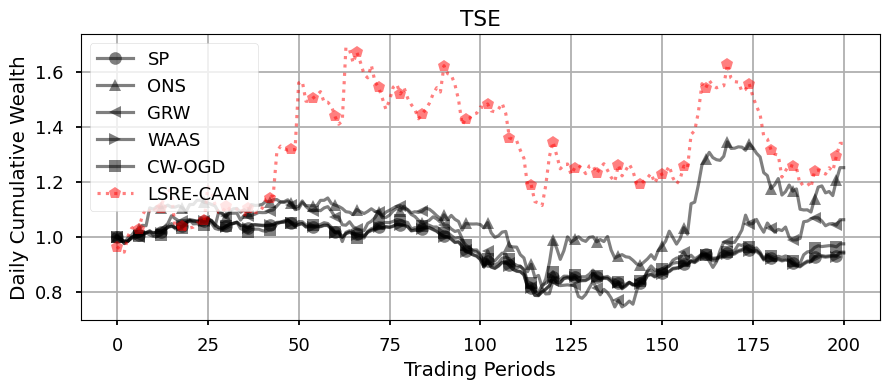

D:\360安全云盘同步版\01-广工\07-研一\00-论文\00-本人论文\13-FinOL\FinOL\finol\evaluation_layer\benchmark_loader.py:110: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5577876913177876' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  final_risk_result.loc[0, MODEL_NAME] = caculate_metric_output["VR"]


Metric    Market      Best      UCRP      BCRP        UP        EG  \
0     VR  0.167026  0.553790  0.168632  0.546973  0.168569  0.168511   
1    MDD  0.264001  0.376866  0.260875  0.376573  0.261233  0.260966   

       SCRP       PPT      SSPO  ...       RMR      RPRT     AICTR      KTPT  \
0  0.562573  0.935829  0.950251  ...  0.722251  0.947436  0.931866  0.882864   
1  0.696932  0.221444  0.225630  ...  0.185634  0.297570  0.309431  0.238788   

         SP       ONS       GRW      WAAS    CW-OGD  LSRE-CAAN  
0  0.168632  0.368588  0.307804  0.168442  0.205946   0.557788  
1  0.260875  0.284658  0.343130  0.261301  0.248703   0.340294  

[2 rows x 27 columns]

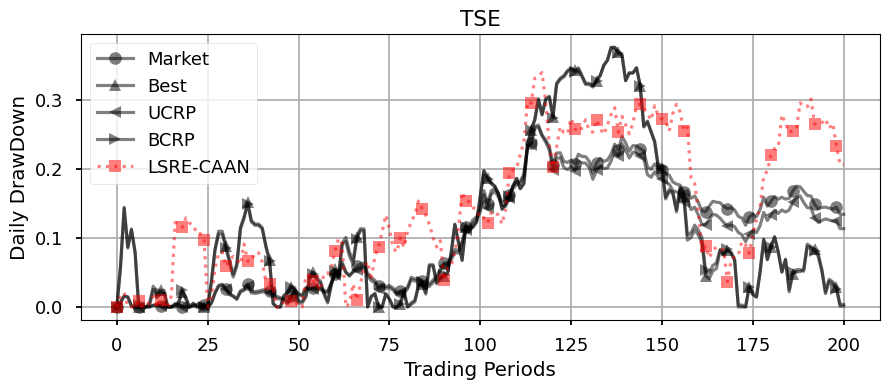

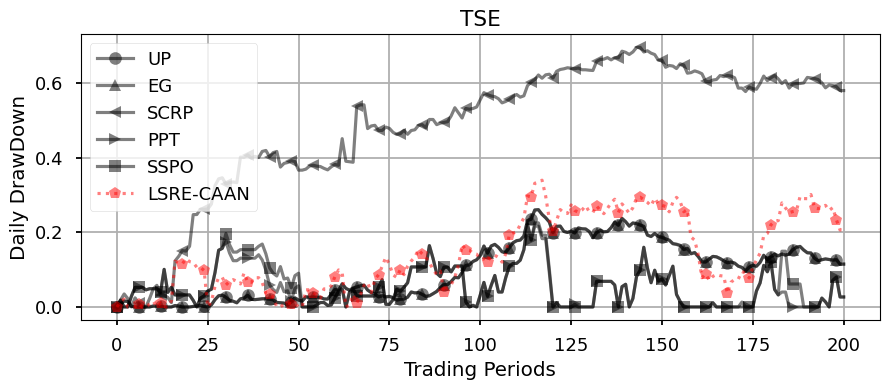

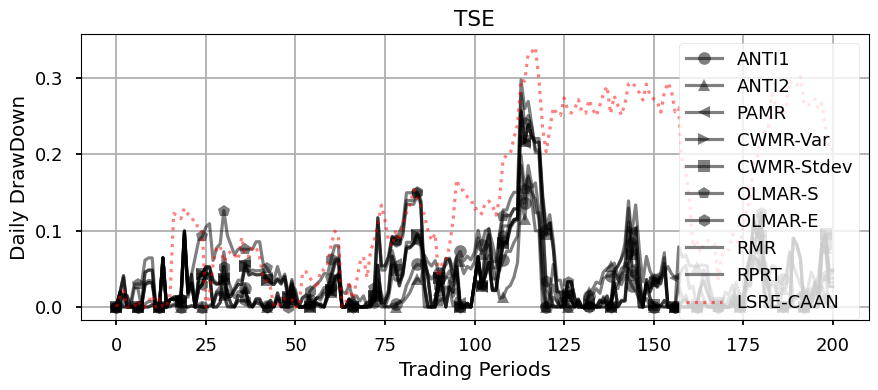

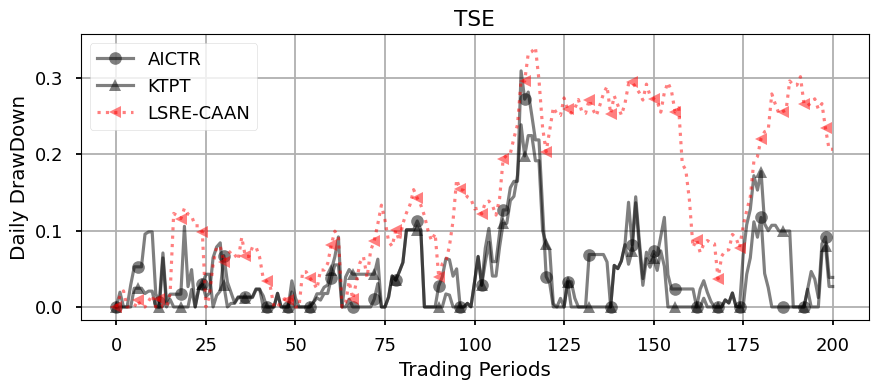

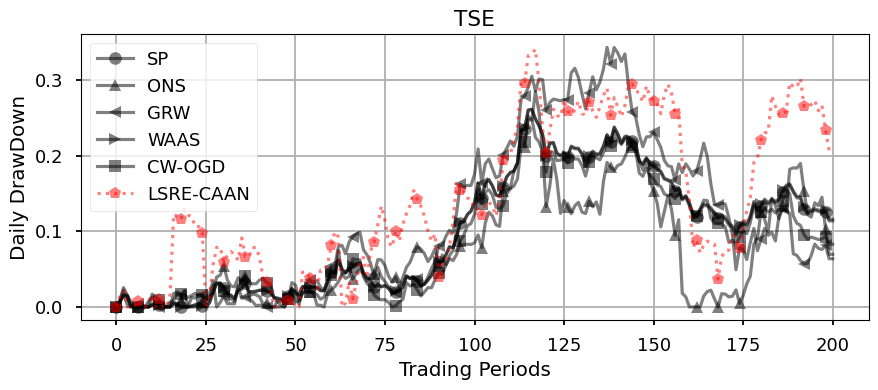

D:\360安全云盘同步版\01-广工\07-研一\00-论文\00-本人论文\13-FinOL\FinOL\finol\evaluation_layer\benchmark_loader.py:130: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.43757519617092416' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  final_practical_result.loc[0, MODEL_NAME] = caculate_metric_output["ATO"]


Metric    Market      Best      UCRP      BCRP        UP        EG  \
0    ATO  0.000000  0.000000  0.010619  0.003025  0.019789  0.010203   
1     RT  0.000607  0.000772  0.000611  0.000996  0.091344  0.002300   

       SCRP       PPT       SSPO  ...       RMR      RPRT     AICTR      KTPT  \
0  0.124237  0.553660   0.529740  ...  0.674942  0.686961  0.664081  0.763568   
1  5.162115  0.002196  11.551258  ...  0.012206  0.003629  0.009328  0.498936   

         SP       ONS       GRW      WAAS    CW-OGD  LSRE-CAAN  
0  0.010619  0.095267  0.129853  0.012216  0.018738   0.437575  
1  0.016422  0.250247  0.374519  0.626888  0.007928   2.862545  

[2 rows x 27 columns]

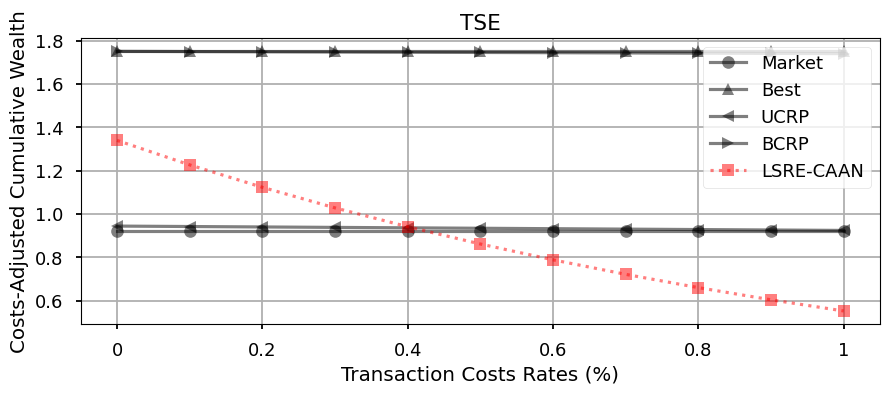

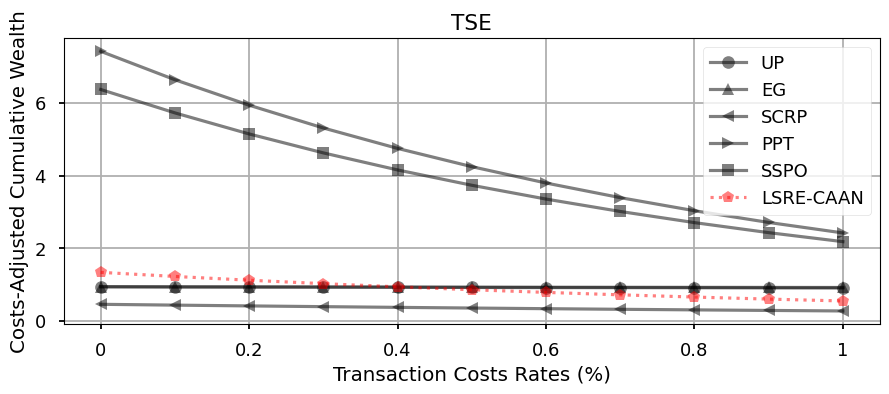

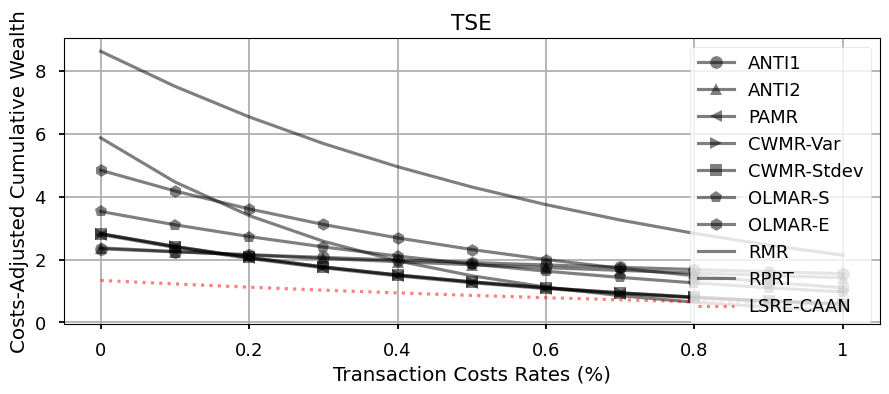

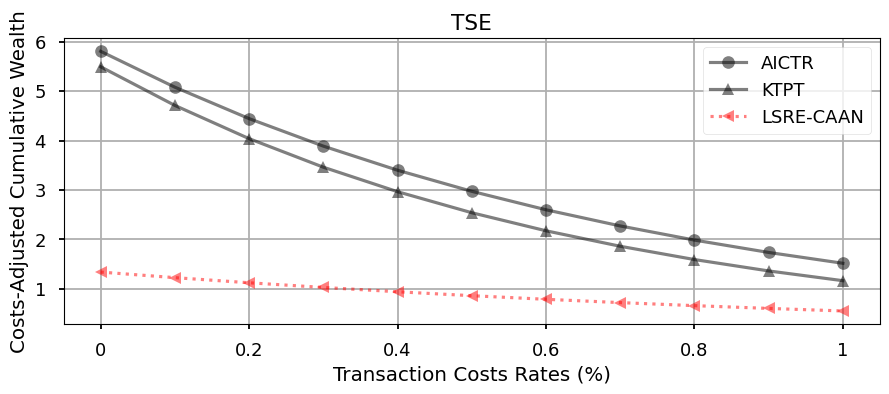

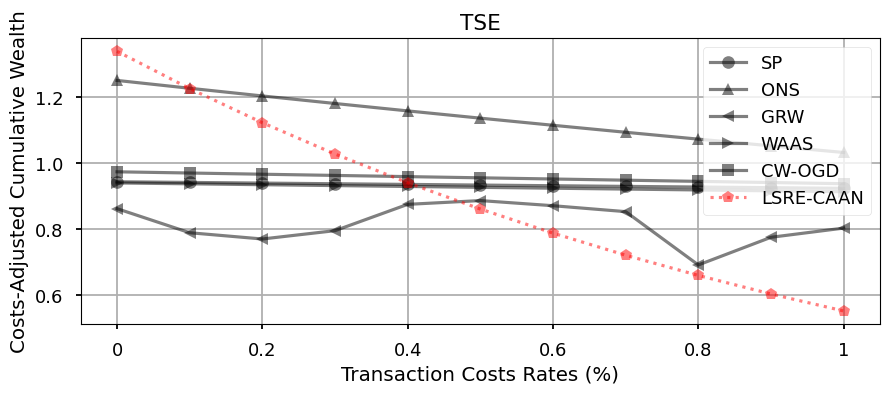

In [3]:
train_model_output = {
    "last_model": None,
    "best_model": None,
    "logdir": None,
    # "logdir": ROOT_PATH + '/evaluation_layer/logdir/2024-03-17_02-12-52',
}

if train_model_output['logdir'] == None:
    directory = ROOT_PATH + '/evaluation_layer/logdir'  # 替换为你要获取文件夹列表的目录路径

    for foldername in os.listdir(directory):
        if foldername.startswith('2024') and os.path.isdir(os.path.join(directory, foldername)):
            train_model_output['logdir'] = ROOT_PATH + '/evaluation_layer/logdir/' + foldername
            pass

evaluate_model(load_dataset_output, train_model_output)

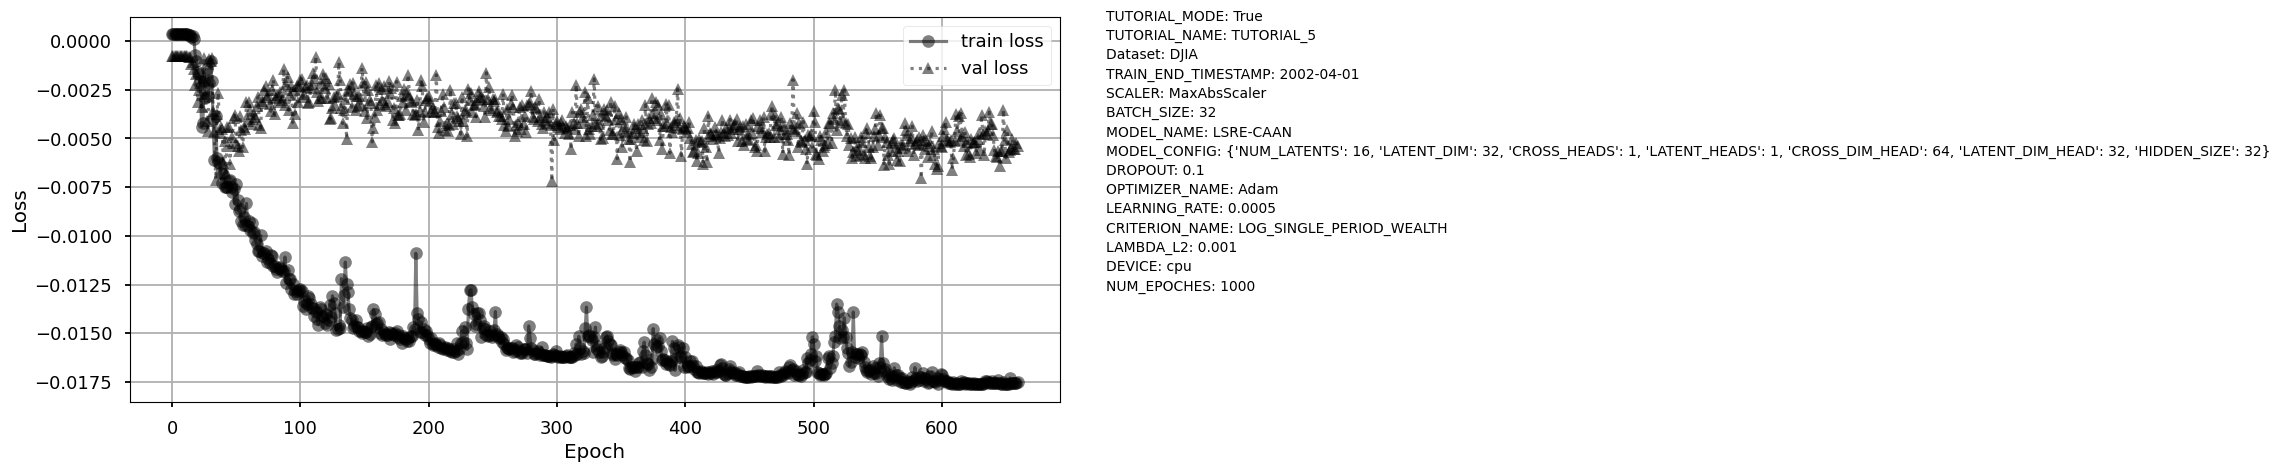

Training:  67%|██████▋   | 669/1000 [20:41<10:14,  1.86s/it]


KeyboardInterrupt: 

In [2]:
load_dataset_output = load_dataset()
print(load_dataset_output)
train_model_output = train_model(load_dataset_output)
evaluate_model(load_dataset_output, train_model_output)

In [ ]:
# load_dataset_output = load_dataset()
train_model_output = {
    "last_model": None,
    "best_model": None,
    "logdir": None,
    # "logdir": ROOT_PATH + '/evaluation_layer/logdir/2024-03-17_02-12-52',
}

if train_model_output['logdir'] == None:
    directory = ROOT_PATH + '/evaluation_layer/logdir'  # 替换为你要获取文件夹列表的目录路径

    for foldername in os.listdir(directory):
        if foldername.startswith('2024') and os.path.isdir(os.path.join(directory, foldername)):
            train_model_output['logdir'] = ROOT_PATH + '/evaluation_layer/logdir/' + foldername
            pass